#### Project objectives
1. Identify and remove outliers using the percentile(upper and lower bounds)
2. Create a new DataFrame that has no outliers
3. Remove outliers using 3 standard deviation on the dataframe in step 2
4. Create a new dataframe
5. Remove outliers using zscore of 3 on the dataframe in step 2
6. Plot boxplots to visualise any ouliers on the old and new DataFrames
7. Plot histograms for new DataFrame that is generated and also plot a bell curve on the same curve

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [7]:
df['Weight'].describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

<Axes: ylabel='Weight'>

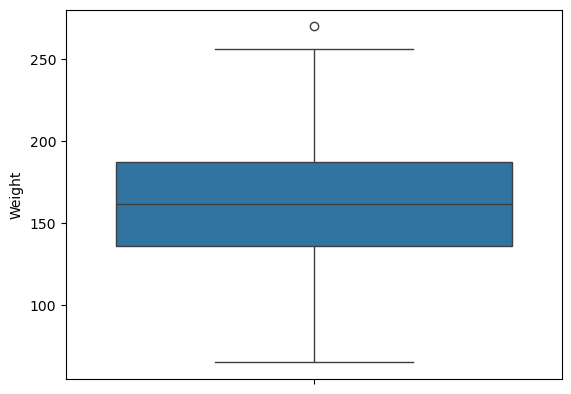

In [6]:
sns.boxplot(df['Weight'])

#### determine the outliers using quantile

In [8]:
q1=df['Weight'].quantile(0.25)
q3=df['Weight'].quantile(0.75)
iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
df1=df[(df['Weight']<lower_bound)|(df['Weight']>upper_bound)]
df1.shape

(1, 3)

In [9]:
df1.head()

,Gender,Height,Weight
2014,Male,78.998742,269.989699


#### generate a new DataFrame **df2** with no outliers

In [10]:
df2=df[(df['Weight']>lower_bound)&(df['Weight']<upper_bound)]
df2.shape

(9999, 3)

In [11]:
df.shape[0]-df2.shape[0]

1

In [13]:
df2['Weight'].describe()

count    9999.000000
mean      161.429501
std        32.091686
min        64.700127
25%       135.817009
50%       161.201891
75%       187.152394
max       255.863326
Name: Weight, dtype: float64

<Axes: ylabel='Weight'>

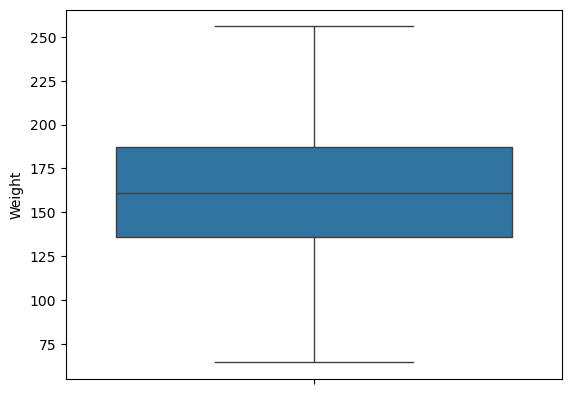

In [14]:
sns.boxplot(df2['Weight'])

<Axes: xlabel='Weight', ylabel='Count'>

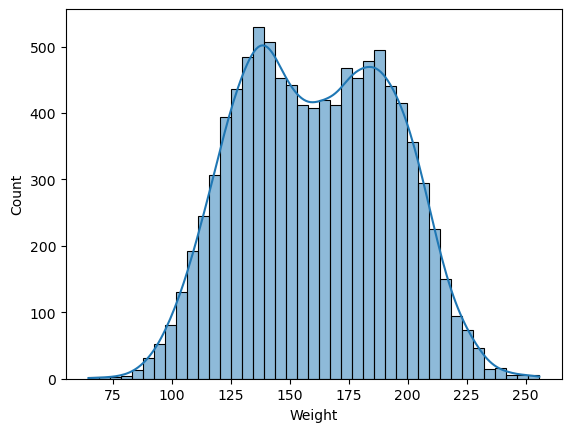

In [16]:
sns.histplot(df2['Weight'],kde=True)

#### detecting outliers using 3 standard deviations

In [90]:
weight_mean=df2['Weight'].mean()
weight_std=df2['Weight'].std()

min_threshold=weight_mean-3*weight_std
max_threshold=weight_mean+3*weight_std
df3=df2[(df2['Weight']<min_threshold)|(df2['Weight']>max_threshold)]
df3.head()

,Gender,Height,Weight
9285,Female,54.263133,64.700127


In [98]:
df.shape[0]-df3.shape[0]

9999

In [92]:
df3.head()

,Gender,Height,Weight
9285,Female,54.263133,64.700127


#### removing the ouliers and generate a new DataFrame that has no outliers

In [95]:
df4=df2[(df2['Weight']>min_threshold)&(df2['Weight']<max_threshold)]
df4.shape[0]

9998

In [96]:
df4.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#### how many rows are outliers

In [97]:
df.shape[0]-df4.shape[0]

2

In [99]:
df4['Weight'].describe()

count    9998.000000
mean      161.439176
std        32.078705
min        68.982530
25%       135.819819
50%       161.212928
75%       187.158031
max       255.863326
Name: Weight, dtype: float64

<Axes: ylabel='Weight'>

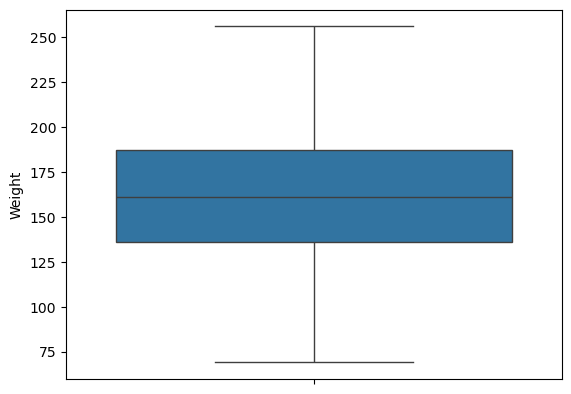

In [114]:
sns.boxplot(df4['Weight'])

<Axes: xlabel='Weight', ylabel='Count'>

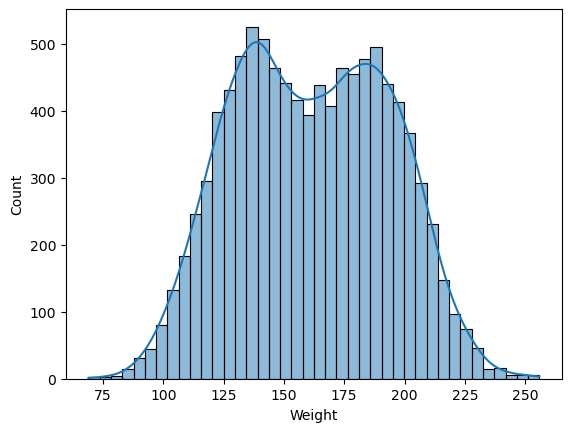

In [115]:
sns.histplot(df4['Weight'],kde=True)

#### detecting outliers using z-score in the **df2** DataFrame

In [108]:
z_score=(df2['Weight']-df2['Weight'].mean())/df2['Weight'].std()
std_weight=df['Weight'].std()
df5=df2.copy()
df5['z_score']=z_score
df5.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,2.507318
1,Male,68.781904,162.310473,0.027452
2,Male,74.110105,212.740856,1.598899
3,Male,71.730978,220.042470,1.826422
4,Male,69.881796,206.349801,1.399749


In [121]:
# outlier detection
df6=df5[(df5['z_score']<-3)|(df5['z_score']>3)]
df6.shape[0]


1

In [123]:
# number of rows with no outliers
df.shape[0]-df6.shape[0]

9999

In [111]:
df6.head()

,Gender,Height,Weight,z_score
9285,Female,54.263133,64.700127,-3.014157


#### remove outliers and create a new DataFrame **df7**

In [117]:
df7=df5[(df5['z_score']>-3)&(df5['z_score']<3)]
df7.shape[0]

9998

<Axes: ylabel='Weight'>

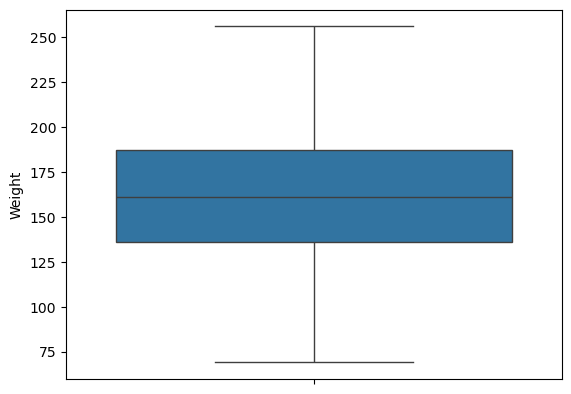

In [118]:
sns.boxplot(df7['Weight'])

<Axes: xlabel='Weight', ylabel='Count'>

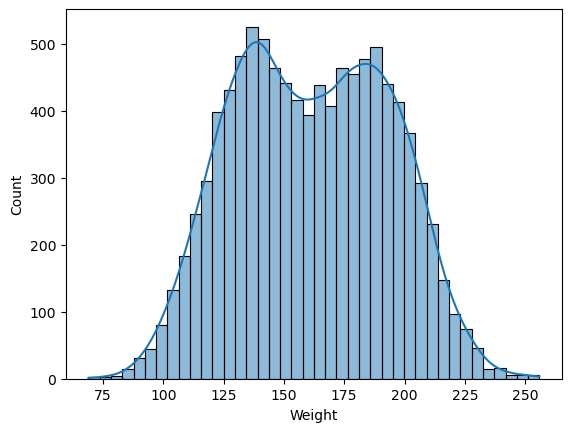

In [120]:
sns.histplot(df7['Weight'],kde=True)